In [1]:
'''Predicting total net revenue'''

'Predicting total net revenue'

In [3]:
import pandas as pd
from matplotlib import pyplot
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statistics
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from statsmodels.tsa.arima_model import ARIMA
import itertools
import os

In [4]:
pwd()

'/Users/julia/Desktop/Thesis/Code Repository'

In [5]:
os.chdir('/Users/julia/Desktop/Thesis/Code Repository')

In [6]:
df = pd.read_csv('mv_port_processed_clusters.csv')

In [7]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df['Project Number'] = df['Project Number'].astype('str') 
df = df.loc[:, ~df.columns.str.contains('^index')]

In [8]:
df = df[df['Project Number'] != 'fw0labor00in'] 
df = df[df['Project Number'] != 'fw0labor0out']

In [14]:
df.columns

Index(['Project Name', 'Health and Safety Status', 'Project Status',
       'SalesCloudClientNo', 'Contract Type Name',
       'Ultimate Customer AUS Market Sector', 'Division Short Name',
       'location_2', 'location_4', 'Region', 'Country', 'Proj_CVP',
       'Proj_Serv_Offering', 'CVP Description', 'primary_client_industry',
       'Sales Cloud Opportunity Number', 'Funding Amount - ITC (Snapshot)',
       'Backlog NR', 'Actual Direct Labor Cost - MTD',
       'Actual Non-Labor Cost - MTD', 'Actual Gross Revenue - MTD',
       'Actual Net Revenue - MTD', 'EBITA - MTD',
       'Forecast Direct Labor Cost - ITC', 'Forecast Net Revenue - ITC',
       'Order Intake (NR) - MTD', 'bookings_jtd', 'interest_current',
       'interest_jtd', 'interest_ytd', 'multiplier_budget',
       'multiplier_current', 'multiplier_target', 'overhead_current',
       'overhead_rate', 'revenue_type', 'AUS Mkt Sector Aggregate',
       'Baseline NR', 'Break Even Multiplier - Project', 'Organization Size',


In [343]:
df['Month'].unique()

array([3., 1., 2., 0.])

In [9]:
df_sub = df.groupby(['Date'])['Actual Net Revenue - MTD'].sum().reset_index()

In [15]:
df_sub.iloc[50:]

,Date,Actual Net Revenue - MTD
50,2020-03-01,75483238.22
51,2020-04-01,93733622.94
52,2020-05-01,73392074.20
53,2020-06-01,79261671.65
54,2020-07-01,83011419.96
55,2020-08-01,62688618.47
56,2020-09-01,84359623.72
57,2020-10-01,77023069.43
58,2020-11-01,72803169.39
59,2020-12-01,75877551.10


In [10]:
df_sub['Date'] = pd.to_datetime(df_sub['Date'], format='%Y%m') 

In [11]:
timedf = df_sub.set_index('Date')

In [20]:
p = d = q = range(1, 5)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (1, 1, 2) x (1, 1, 2, 12)
SARIMAX: (1, 1, 2) x (1, 1, 3, 12)
SARIMAX: (1, 1, 3) x (1, 1, 4, 12)
SARIMAX: (1, 1, 3) x (1, 2, 1, 12)


In [55]:
# This is simulating a grid search for the most optimal parameters? 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(timedf, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1286.1402266297805
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:862.8128549005115
ARIMA(1, 1, 1)x(1, 1, 3, 12)12 - AIC:436.4896179959439
ARIMA(1, 1, 1)x(1, 1, 4, 12)12 - AIC:16.0
ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:2514.318882297168
ARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:445.2085365128763
ARIMA(1, 1, 1)x(1, 2, 3, 12)12 - AIC:14.0
ARIMA(1, 1, 1)x(1, 2, 4, 12)12 - AIC:16.0
ARIMA(1, 1, 1)x(1, 3, 1, 12)12 - AIC:456.80671909809416
ARIMA(1, 1, 1)x(1, 3, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(1, 3, 3, 12)12 - AIC:14.0
ARIMA(1, 1, 1)x(1, 3, 4, 12)12 - AIC:16.0
ARIMA(1, 1, 1)x(1, 4, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 4, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(1, 4, 3, 12)12 - AIC:14.0
ARIMA(1, 1, 1)x(1, 4, 4, 12)12 - AIC:16.0
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:895.8969027447496
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:863.116052521895
ARIMA(1, 1, 1)x(2, 1, 3, 12)12 - AIC:435.4292304945904
ARIMA(1, 1, 1)x(2, 1, 4, 12)12 - AIC:18.0
ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:481.2

In [65]:
import statsmodels.api as sm
import itertools

# Grid Search
p = d = q = range(0,2) # p, d, and q can be either 0, 1, or 2
pdq = list(itertools.product(p,d,q)) # gets all possible combinations of p, d, and q 
p2 = d2 = q2 = range(0, 2) # second set of p's, d's, and q's
pdq2 = list(itertools.product(p2,d2,q2)) # simular too code above but for seasonal parameters
s = 12 # here I use twelve but the number here is representative of the periodicty of the seasonal cycle
pdqs2 = [(c[0], c[1], c[2], s) for c in pdq2]
combs = {}
aics = []
# Grid Search Continued
for combination in pdq:
    for seasonal_combination in pdqs2:
        try:
            model = sm.tsa.statespace.SARIMAX(timedf, order=combination, seasonal_order=seasonal_combination)
                                             #enforce_stationarity=False,
                                             #enforce_invertibility=False)
            model = model.fit()
            combs.update({model.aic : [combination, seasonal_combination]})
            aics.append(model.aic)
            
        except:
            continue
            
best_aic = min(aics)

# Modeling and forcasting
model = sm.tsa.statespace.SARIMAX(timedf, order=combs[best_aic][0], seasonal_order=combs[best_aic][1])
                                             #enforce_stationarity=False,
                                             #enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6967      0.176     -3.954      0.000      -1.042      -0.351
ma.S.L12      -0.6507      0.282     -2.309      0.021      -1.203      -0.098
sigma2      1.973e+14        nan        nan        nan         nan         nan


In [21]:
order=(1, 1, 3)

seasonal_order=(1, 1, 3, 12)
    
    
# Modeling and forcasting
model = sm.tsa.statespace.SARIMAX(timedf, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.forecast(10)
print(results.summary().tables[1])    

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5294      5.896     -0.090      0.928     -12.086      11.027
ma.L1          0.4575      5.262      0.087      0.931      -9.856      10.771
ma.L2          0.1794      6.207      0.029      0.977     -11.986      12.344
ma.L3          0.5484      1.842      0.298      0.766      -3.061       4.158
ar.S.L12       0.7370     31.307      0.024      0.981     -60.623      62.097
ma.S.L12      -1.6960     27.951     -0.061      0.952     -56.479      53.087
ma.S.L24       1.1606     34.175      0.034      0.973     -65.822      68.143
ma.S.L36       0.1069     24.962      0.004      0.997     -48.817      49.031
sigma2      1.972e+14   8.34e-14   2.37e+27      0.000    1.97e+14    1.97e+14


In [133]:
#Fit the model with the best parameters
mod = sm.tsa.statespace.SARIMAX(timedf,
                                order=(5, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                #enforce_stationarity=False,
                                enforce_invertibility=False) 
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7409      0.263     -2.822      0.005      -1.256      -0.226
ar.L2         -0.5090      0.292     -1.744      0.081      -1.081       0.063
ar.L3         -0.1666      0.249     -0.669      0.504      -0.655       0.322
ar.L4         -0.2005      0.237     -0.846      0.398      -0.665       0.264
ar.L5         -0.0024      0.229     -0.010      0.992      -0.451       0.446
ar.S.L12      -0.5957      0.308     -1.937      0.053      -1.199       0.007
sigma2      1.651e+14   5.85e-16   2.82e+29      0.000    1.65e+14    1.65e+14


In [22]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

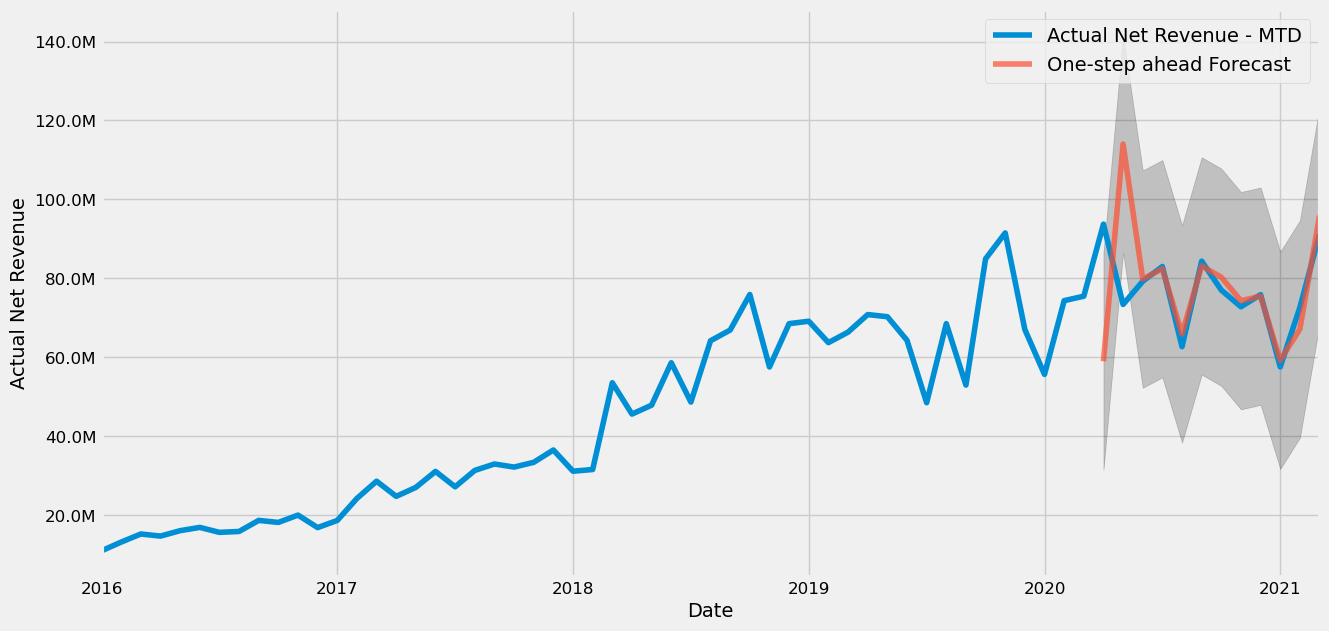

In [90]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)


pred = results.get_prediction(start=pd.to_datetime('2020-04'), dynamic=False)
pred_ci = pred.conf_int()
ax = timedf['2016-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Actual Net Revenue')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.legend()
plt.show()

In [91]:
y_forecasted = pred.predicted_mean
y_truth = timedf['2020-04':]
y_truth = pd.Series(y_truth['Actual Net Revenue - MTD'].values, index=y_truth.index)
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 244904726222735.03


In [345]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


r2score=r2_score(y_truth, y_forecasted)
print(r2score)

mse=mean_squared_error(y_truth, y_forecasted)

import numpy as np
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
print('The normalized Root Mean Squared Error of our forecasts is {}'.format( (round(np.sqrt(mse), 2))/ ((y_truth.max() - y_truth.min())* 100)))

-8.37611229827458
The Mean Squared Error of our forecasts is 944935857321712.8
The Root Mean Squared Error of our forecasts is 30739809.0
The normalized Root Mean Squared Error of our forecasts is 0.008498224929150007


In [89]:
### Out of sample predictions
len(y_forecasted)

13

In [29]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import scipy
from scipy.stats import boxcox

Using TensorFlow backend.


In [31]:
sequence_untransformed = timedf['Actual Net Revenue - MTD'].values

In [33]:
'Training set is sequence'
sequenceall = scipy.stats.boxcox(sequence_untransformed, lmbda=0.65, alpha=None)
sequence = sequenceall[:-24]

In [35]:
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [36]:
n_steps_in, n_steps_out = 12, 12

X, y = split_sequence(sequence, n_steps_in, n_steps_out)

In [37]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [38]:
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=0)

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12, 100)           40800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1212      
Total params: 122,412
Trainable params: 122,412
Non-trainable params: 0
_________________________________________________________________


In [40]:
# demonstrate prediction
x_input = sequence[-24:-12]
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[108922.36 184582.16 151417.92 154385.6  141723.9  187761.   162950.05
  205290.72 144802.77 257230.   187292.66 248799.56]]


In [54]:
from scipy.special import inv_boxcox

yhat = inv_boxcox(yhat, 0.65)

In [55]:
yhat

array([2.89464240e+07, 6.51644240e+07, 4.80490680e+07, 4.95054800e+07,
       4.33989280e+07, 6.68989320e+07, 5.37930720e+07, 7.67459600e+07,
       4.48578480e+07, 1.08580136e+08, 6.66423840e+07, 1.03153960e+08],
      dtype=float32)

In [41]:
yhat=yhat.reshape(12,)

In [79]:
time=df_sub['Date'][-12:]

In [80]:
len(time)

12

In [81]:
time = sorted(time.values)
data = {'Date': time, 'Predict': yhat}
# Create DataFrame.
df1 = pd.DataFrame(data)

In [93]:
y_forecasted = pred.predicted_mean
data = {'Date': time, 'Predict': y_forecasted.values}
# Create DataFrame.
df3 = pd.DataFrame(data)

In [94]:
time=df_sub['Date']
time = sorted(time.values)

In [102]:
data = {'Date': time, 'Predict': sequence_untransformed}
# Create DataFrame.
df2 = pd.DataFrame(data)

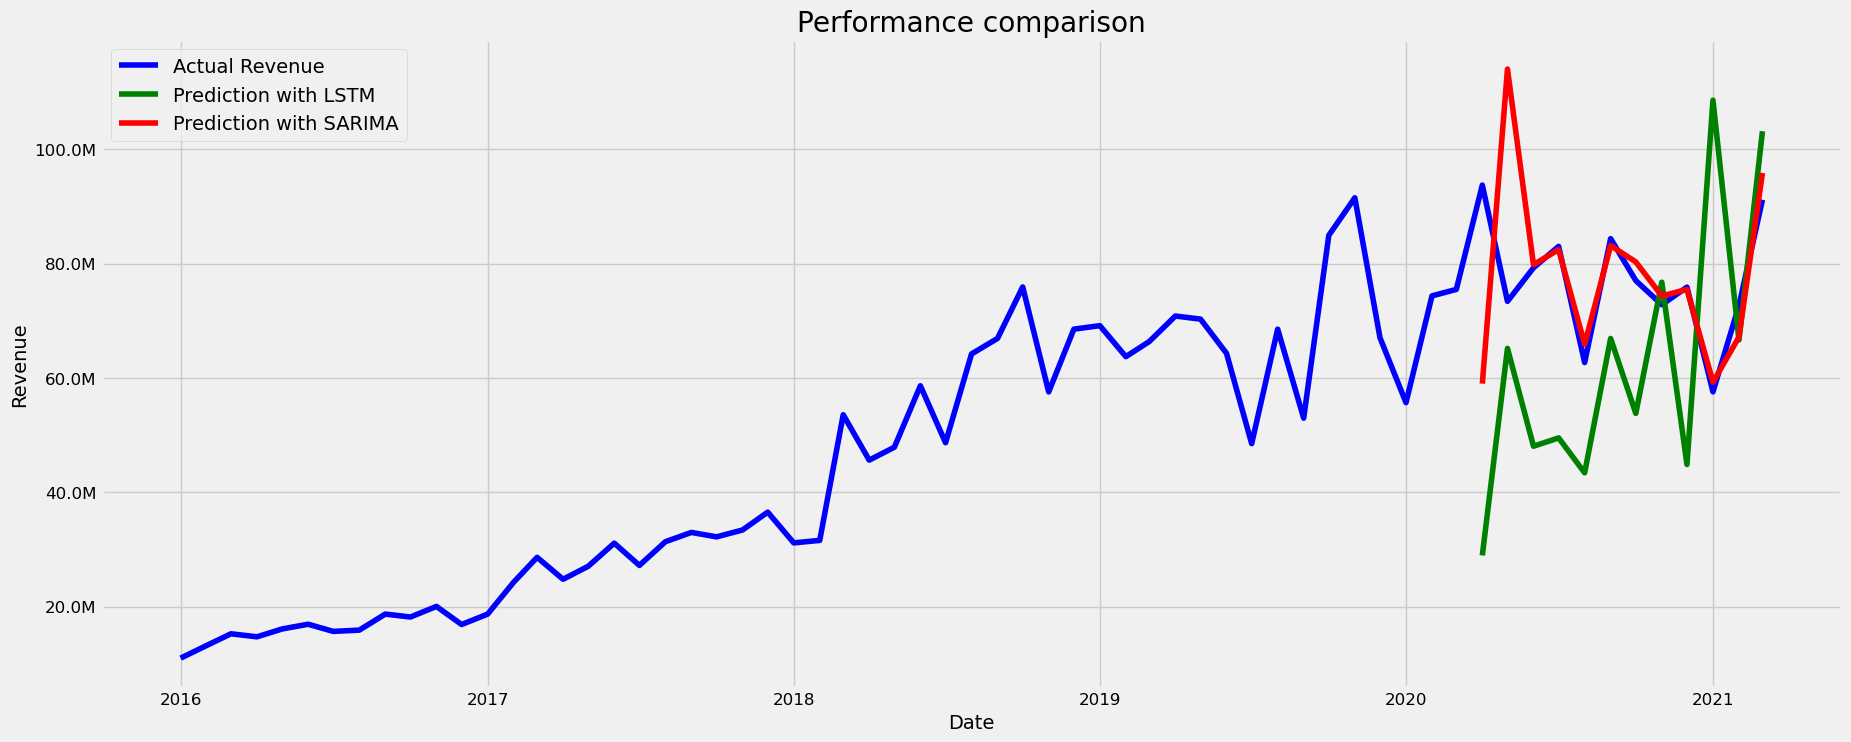

In [104]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

another_df = timedf
y_forecasted = yhat
plt.figure(figsize=(20, 8))
#plt.plot(timedf.index, timedf['Actual Net Revenue - MTD'], 'b-', label = 'Actual Revenue')
plt.plot(df2['Date'], df2['Predict'], 'b-', label = 'Actual Revenue')
plt.plot(df1['Date'], df1['Predict'], 'g-', label = 'Prediction with LSTM')
plt.plot(df3['Date'], df3['Predict'], 'r-', label = 'Prediction with SARIMA')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.xlabel('Date'); plt.ylabel('Revenue'); plt.title('Performance comparison')
plt.legend();
plt.show()

In [105]:
mse = ((yhat - y_truth) ** 2).mean()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


r2score=r2_score(y_truth, yhat)
print(r2score)

mse=mean_squared_error(yhat, y_truth)

import numpy as np
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
print('The normalized Root Mean Squared Error of our forecasts is {}'.format( (round(np.sqrt(mse), 2))/ ((y_truth.max() - y_truth.min())* 100)))

-8.37611229827458
The Mean Squared Error of our forecasts is 944935857321712.8
The Root Mean Squared Error of our forecasts is 30739809.0
The normalized Root Mean Squared Error of our forecasts is 0.008498224929150007


### An encoder decoder architecture

In [106]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [115]:
sequence_untransformed = timedf['Actual Net Revenue - MTD'].values

In [168]:
sequenceall = scipy.stats.boxcox(sequence_untransformed, lmbda=0.65, alpha=None)
sequence = sequenceall[:-24]

In [169]:
n_steps_in, n_steps_out = 12, 12

X, y = split_sequence(sequence, n_steps_in, n_steps_out)

In [173]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = y.reshape((X.shape[0], X.shape[1], n_features))

In [175]:
X.shape

(16, 12, 1)

In [119]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=100, verbose=0)

In [120]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100)               40800     
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 12, 100)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 12, 100)           80400     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 12, 1)             101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [122]:
x_input = sequenceall[-24:-12]
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat2 = model.predict(x_input, verbose=0)
print(yhat2)

[[[ 49918.668]
  [103323.19 ]
  [136049.14 ]
  [136835.02 ]
  [180176.36 ]
  [212197.23 ]
  [252296.73 ]
  [283599.94 ]
  [273776.25 ]
  [302853.9  ]
  [330591.03 ]
  [350779.3  ]]]


In [123]:
from scipy.special import inv_boxcox

yhat2 = inv_boxcox(yhat2, 0.65)
yhat2=yhat2.reshape(12,)
yhat2

array([8.71549600e+06, 2.66891680e+07, 4.07545160e+07, 4.11172520e+07,
       6.27869360e+07, 8.07539360e+07, 1.05393064e+08, 1.26170248e+08,
       1.19509568e+08, 1.39586848e+08, 1.59733056e+08, 1.74984304e+08],
      dtype=float32)

In [124]:
mse = ((yhat2 - y_truth) ** 2).mean()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


r2score=r2_score(y_truth, yhat2)
print(r2score)

mse=mean_squared_error(yhat2, y_truth)

import numpy as np
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
print('The normalized Root Mean Squared Error of our forecasts is {}'.format( (round(np.sqrt(mse), 2))/ ((y_truth.max() - y_truth.min())* 100)))

-31.70498082769877
The Mean Squared Error of our forecasts is 3296047243674630.0
The Root Mean Squared Error of our forecasts is 57411211.83
The normalized Root Mean Squared Error of our forecasts is 0.01587171187649272


### CNN LSTM

the input here is a bit different
[samples, subsequences, timesteps, features]

This can be achieved by wrapping the entire CNN model in a TimeDistributed wrapper that will apply the entire model once per input, in this case, once per input subsequence.

The CNN model first has a convolutional layer for reading across the subsequence that requires a number of filters and a kernel size to be specified. The number of filters is the number of reads or interpretations of the input sequence. The kernel size is the number of time steps included of each ‘read’ operation of the input sequence.

The convolution layer is followed by a max pooling layer that distills the filter maps down to 1/2 of their size that includes the most salient features. These structures are then flattened down to a single one-dimensional vector to be used as a single input time step to the LSTM layer.

In [209]:
sequenceall = scipy.stats.boxcox(sequence_untransformed, lmbda=0.65, alpha=None)
sequence = sequenceall[:-24]

n_steps_in, n_steps_out = 12, 12

X, y = split_sequence(sequence, n_steps_in, n_steps_out)


In [210]:
X.shape

(16, 12)

In [211]:
X.shape

n_features = 1
n_seq = 1
n_steps = 1
X = X.reshape((X.shape[0], X.shape[1], n_steps, n_features))
y = y.reshape((y.shape[0], y.shape[1], n_steps, n_features))

In [212]:
# the shape must be [samples, timesteps, rows, columns, features]
'''

n_seq = 3
steps = int(n_steps_out/n_seq)

X = X.reshape((X.shape[0], X.shape[1], steps, n_features))
y = y.reshape((X.shape[0], X.shape[1], steps, n_features))

'''

'\n\nn_seq = 3\nsteps = int(n_steps_out/n_seq)\n\nX = X.reshape((X.shape[0], X.shape[1], steps, n_features))\ny = y.reshape((X.shape[0], X.shape[1], steps, n_features))\n\n'

In [213]:
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D, Flatten, ConvLSTM2D
from keras.layers import Activation, Dense
from keras.optimizers import Adam

from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D



model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [214]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_8 (TimeDist (None, None, 1, 64)       128       
_________________________________________________________________
time_distributed_9 (TimeDist (None, None, 1, 64)       0         
_________________________________________________________________
time_distributed_10 (TimeDis (None, None, 64)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                23000     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 23,179
Trainable params: 23,179
Non-trainable params: 0
_________________________________________________________________


In [225]:
x_input = sequenceall[-24:-12]
x_input = x_input.reshape((x_input.shape[0], 1, 1, n_features))

yhat3 = model.predict(x_input, verbose=0)
print(yhat3)

[[ 8682.313 ]
 [ 8639.705 ]
 [ 8154.1987]
 [ 6788.295 ]
 [ 8498.613 ]
 [ 7187.891 ]
 [ 9771.587 ]
 [10255.997 ]
 [ 8376.81  ]
 [ 7425.0664]
 [ 8961.083 ]
 [ 9049.516 ]]


In [226]:
from scipy.special import inv_boxcox

yhat3 = inv_boxcox(yhat3, 0.65)
yhat3=yhat3.reshape(12,)
yhat3

array([591196.9 , 586740.06, 536797.3 , 404895.03, 572066.3 , 442130.66,
       709067.56, 763853.4 , 559503.6 , 464768.4 , 620645.94, 630092.1 ],
      dtype=float32)

In [227]:
mse = ((yhat3 - y_truth) ** 2).mean()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


r2score=r2_score(y_truth, yhat3)
print(r2score)

mse=mean_squared_error(yhat3, y_truth)

import numpy as np
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
print('The normalized Root Mean Squared Error of our forecasts is {}'.format( (round(np.sqrt(mse), 2))/ ((y_truth.max() - y_truth.min())* 100)))

-57.898631779366895
The Mean Squared Error of our forecasts is 5935874842897714.0
The Root Mean Squared Error of our forecasts is 77044628.9
The normalized Root Mean Squared Error of our forecasts is 0.021299500786588852


In [1]:
(y_truth.max() - y_truth.min())

NameError: name 'y_truth' is not defined

In [237]:
time=df_sub['Date'][-12:]

In [238]:
time=sorted(time.values)

In [243]:
data = {'Date': time, 'Predict': yhat2}
# Create DataFrame.
df5 = pd.DataFrame(data)


In [244]:
data = {'Date': time, 'Predict': yhat3}
# Create DataFrame.
df6 = pd.DataFrame(data)

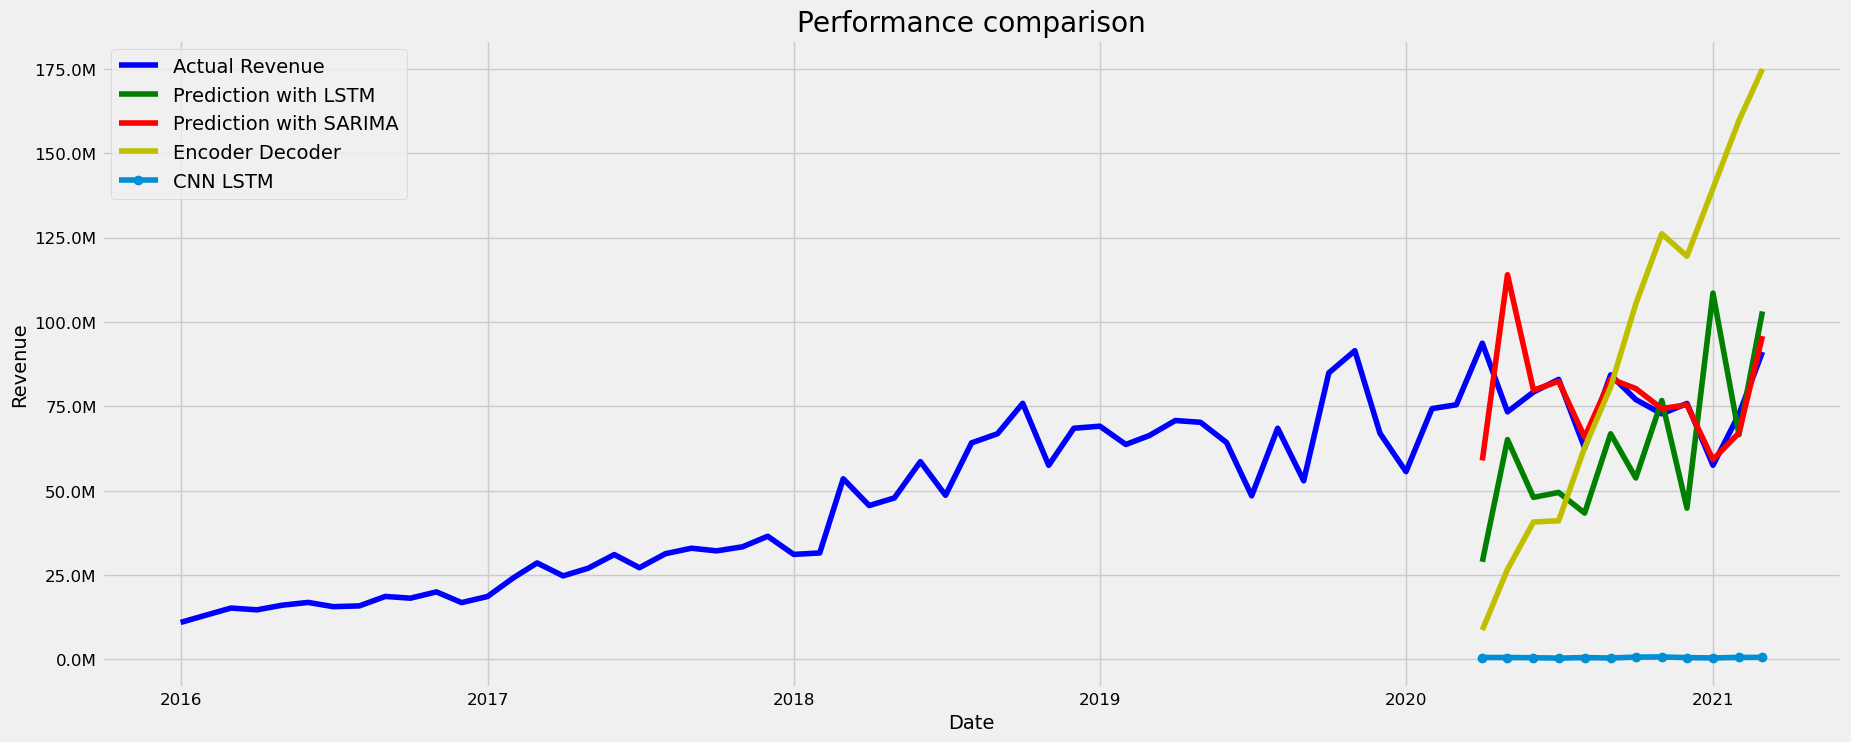

In [246]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

another_df = timedf
y_forecasted = yhat
plt.figure(figsize=(20, 8))
#plt.plot(timedf.index, timedf['Actual Net Revenue - MTD'], 'b-', label = 'Actual Revenue')
plt.plot(df2['Date'], df2['Predict'], 'b-', label = 'Actual Revenue')
plt.plot(df1['Date'], df1['Predict'], 'g-', label = 'Prediction with LSTM')
plt.plot(df3['Date'], df3['Predict'], 'r-', label = 'Prediction with SARIMA')
plt.plot(df5['Date'], df5['Predict'], 'y-', label = 'Encoder Decoder')
plt.plot(df6['Date'], df6['Predict'], 'o-', label = 'CNN LSTM')


plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.xlabel('Date'); plt.ylabel('Revenue'); plt.title('Performance comparison')
plt.legend();
plt.show()

In [248]:
print(df.columns.tolist())


['Project Name', 'Health and Safety Status', 'Project Status', 'SalesCloudClientNo', 'Contract Type Name', 'Ultimate Customer AUS Market Sector', 'Division Short Name', 'location_2', 'location_4', 'Region', 'Country', 'Proj_CVP', 'Proj_Serv_Offering', 'CVP Description', 'primary_client_industry', 'Sales Cloud Opportunity Number', 'Funding Amount - ITC (Snapshot)', 'Backlog NR', 'Actual Direct Labor Cost - MTD', 'Actual Non-Labor Cost - MTD', 'Actual Gross Revenue - MTD', 'Actual Net Revenue - MTD', 'EBITA - MTD', 'Forecast Direct Labor Cost - ITC', 'Forecast Net Revenue - ITC', 'Order Intake (NR) - MTD', 'bookings_jtd', 'interest_current', 'interest_jtd', 'interest_ytd', 'multiplier_budget', 'multiplier_current', 'multiplier_target', 'overhead_current', 'overhead_rate', 'revenue_type', 'AUS Mkt Sector Aggregate', 'Baseline NR', 'Break Even Multiplier - Project', 'Organization Size', 'Risk Profile', 'riskrating_project', 'ActualNR_sum', 'Projectduration', 'Date', 'Project Number', 'Comp

In [ ]:
### Now let's try multi variate forecasting

In [256]:
df_sub1 = df.groupby(['Date'])['Actual Net Revenue - MTD', 'Actual Direct Labor Cost - MTD'].sum().reset_index()
df_sub1

,Date,Actual Net Revenue - MTD,Actual Direct Labor Cost - MTD
0,201601,10983747.75,4021250.93
1,201602,13194378.29,4716248.51
2,201603,15241979.46,6057359.70
3,201604,14713074.24,5147721.52
4,201605,16085932.70,5446076.66
...,...,...,...
58,202011,72803169.39,26550359.19
59,202012,75877551.10,27340727.36
60,202101,57561587.89,21699144.08
61,202102,72661198.77,26126001.92


In [254]:
df_sub2 = df.groupby(['Date'])['seasonality_month', 'Month', 'ADL_shifted', 'ANR_shifted', 'ANR_previous_year'].max().reset_index()
df_sub2

,Date,seasonality_month,Month,ADL_shifted,ANR_shifted,ANR_previous_year
0,201601,1,2.0,0.00,0.00,0.000000e+00
1,201602,1,1.0,4021250.93,10983747.75,0.000000e+00
2,201603,1,0.0,4716248.51,13194378.29,0.000000e+00
3,201604,2,0.0,6057359.70,15241979.46,0.000000e+00
4,201605,2,1.0,5147721.52,14713074.24,0.000000e+00
...,...,...,...,...,...,...
58,202011,4,2.0,26907672.35,77023069.43,9.151016e+07
59,202012,4,1.0,26550359.19,72803169.39,6.702559e+07
60,202101,1,2.0,27340727.36,75877551.10,5.567489e+07
61,202102,1,1.0,21699144.08,57561587.89,7.435141e+07


In [266]:
df1_sub = pd.merge(df_sub1, df_sub2, how='outer', on='Date')

In [267]:
df1_sub['Date'] = pd.to_datetime(df1_sub['Date'], format='%Y%m') 
timedf1 = df1_sub.set_index('Date')
timedf1

,Actual Net Revenue - MTD,Actual Direct Labor Cost - MTD,seasonality_month,Month,ADL_shifted,ANR_shifted,ANR_previous_year
Date,,,,,,,
2016-01-01,10983747.75,4021250.93,1,2.0,0.00,0.00,0.000000e+00
2016-02-01,13194378.29,4716248.51,1,1.0,4021250.93,10983747.75,0.000000e+00
2016-03-01,15241979.46,6057359.70,1,0.0,4716248.51,13194378.29,0.000000e+00
2016-04-01,14713074.24,5147721.52,2,0.0,6057359.70,15241979.46,0.000000e+00
2016-05-01,16085932.70,5446076.66,2,1.0,5147721.52,14713074.24,0.000000e+00
...,...,...,...,...,...,...,...
2020-11-01,72803169.39,26550359.19,4,2.0,26907672.35,77023069.43,9.151016e+07
2020-12-01,75877551.10,27340727.36,4,1.0,26550359.19,72803169.39,6.702559e+07
2021-01-01,57561587.89,21699144.08,1,2.0,27340727.36,75877551.10,5.567489e+07


In [378]:
## Then we prepare the samples an split them up
from sklearn.model_selection import TimeSeriesSplit
Y = timedf1['Actual Net Revenue - MTD']
X = timedf1.iloc[:, 2:]


#X = np.array(X, dtype=float)
Y = np.array(Y, dtype=float)

total = len(Y)
ind = int(total*0.82)

X_train = X[:ind]
X_test = X[ind:]
Y_train = Y[:ind]
Y_test = Y[ind:]


In [379]:
X_train

,seasonality_month,Month,ADL_shifted,ANR_shifted,ANR_previous_year
Date,,,,,
2016-01-01,1,2.0,0.000000e+00,0.000000e+00,0.00
2016-02-01,1,1.0,4.021251e+06,1.098375e+07,0.00
2016-03-01,1,0.0,4.716249e+06,1.319438e+07,0.00
2016-04-01,2,0.0,6.057360e+06,1.524198e+07,0.00
2016-05-01,2,1.0,5.147722e+06,1.471307e+07,0.00
2016-06-01,2,0.0,5.446077e+06,1.608593e+07,0.00
2016-07-01,3,1.0,6.535312e+06,1.691376e+07,0.00
2016-08-01,3,0.0,5.443462e+06,1.565868e+07,0.00
2016-09-01,4,1.0,5.780471e+06,1.588338e+07,0.00


In [380]:
len(X_train)

51

In [381]:
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
import numpy as np


order=(1, 1, 3)

seasonal_order=(1, 1, 3, 12)

# fit model
model = SARIMAX(Y_train, exog=X_train, order=order, seasonal_order=seasonal_order, trend='n')
model_fit = model.fit(disp=False)
# make prediction

start_index = len(Y_train)
end_index = start_index + len(Y_test) -1

forecast = model_fit.predict(start=start_index, end=end_index, exog=X_test)


print(forecast)

2020-04-01    7.978233e+07
2020-05-01    6.963413e+07
2020-06-01    8.404937e+07
2020-07-01    5.810006e+07
2020-08-01    7.205282e+07
2020-09-01    9.102505e+07
2020-10-01    9.018537e+07
2020-11-01    8.006550e+07
2020-12-01    1.031453e+08
2021-01-01    8.128506e+07
2021-02-01    8.425549e+07
2021-03-01    8.958961e+07
Freq: MS, Name: predicted_mean, dtype: float64


In [386]:
X_train

,seasonality_month,Month,ADL_shifted,ANR_shifted,ANR_previous_year
Date,,,,,
2016-01-01,1,2.0,0.000000e+00,0.000000e+00,0.00
2016-02-01,1,1.0,4.021251e+06,1.098375e+07,0.00
2016-03-01,1,0.0,4.716249e+06,1.319438e+07,0.00
2016-04-01,2,0.0,6.057360e+06,1.524198e+07,0.00
2016-05-01,2,1.0,5.147722e+06,1.471307e+07,0.00
2016-06-01,2,0.0,5.446077e+06,1.608593e+07,0.00
2016-07-01,3,1.0,6.535312e+06,1.691376e+07,0.00
2016-08-01,3,0.0,5.443462e+06,1.565868e+07,0.00
2016-09-01,4,1.0,5.780471e+06,1.588338e+07,0.00


In [383]:
exog_param = model_fit.params[ model.k_exog ] #model.k_trend:model.k_trend +

In [358]:
exog_param

-0.7851775748119773

In [385]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   51
Model:             SARIMAX(1, 1, 3)x(1, 1, 3, 12)   Log Likelihood                -654.905
Date:                            Sun, 20 Jun 2021   AIC                           1337.809
Time:                                    23:09:04   BIC                           1360.735
Sample:                                01-01-2016   HQIC                          1345.966
                                     - 03-01-2020                                         
Covariance Type:                              opg                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
seasonality_month  3.647e-06   5.37e+05   6.79e-12      1.000   -1.05e+06    1.05e+06
Month             -2.909e+06   1.57e+04   -184.724      0.000   -2.94e+06   -2.88e+06
ADL_shifted           1.9139      1.075      1.781      0.075      -0.192       4.020
ANR_shifted          -0.7339      0.358     -2.053      0.040      -1.435      -0.033
ANR_previous_year    -0.7322      0.820     -0.893      0.372      -2.339       0.874
ar.L1                -0.7852      0.416     -1.885      0.059      -1.601       0.031
ma.L1                 0.7487      0.448      1.671      0.095      -0.130       1.627
ma.L2                -0.0481      0.540     -0.089      0.929      -1.107       1.010
ma.L3                -0.4678      0.309     -1.516      0.130      -1.073       0.137
ar.S.L12             -0.4480     26.500     -0.017      0.987     -52.386      51.490
ma.S.L12              0.5273     26.577      0.020      0.984     -51.562      52.617
ma.S.L24             -0.1799      2.174     -0.083      0.934      -4.441       4.081
ma.S.L36             -0.0508      6.206     -0.008      0.993     -12.215      12.113
sigma2             7.648e+13      0.000   3.83e+17      0.000    7.65e+13    7.65e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.99   Prob(JB):                         0.90
Heteroskedasticity (H):               2.57   Skew:                             0.11
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.95e+34. Standard errors may be unstable.
"""

In [384]:
mse = ((forecast - y_truth) ** 2).mean()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


r2score=r2_score(y_truth, forecast)
print(r2score)

mse=mean_squared_error(forecast, y_truth)

import numpy as np
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
print('The normalized Root Mean Squared Error of our forecasts is {}'.format( (round(np.sqrt(mse), 2))/ ((y_truth.max() - y_truth.min())* 100)))

-1.1941879500152157
The Mean Squared Error of our forecasts is 221132896632877.03
The Root Mean Squared Error of our forecasts is 14870537.87
The normalized Root Mean Squared Error of our forecasts is 0.004111059233865222


In [376]:
time=df_sub['Date'][-12:]
time=sorted(time.values)

data = {'Date': time, 'Predict': forecast}
# Create DataFrame.
df7 = pd.DataFrame(data)


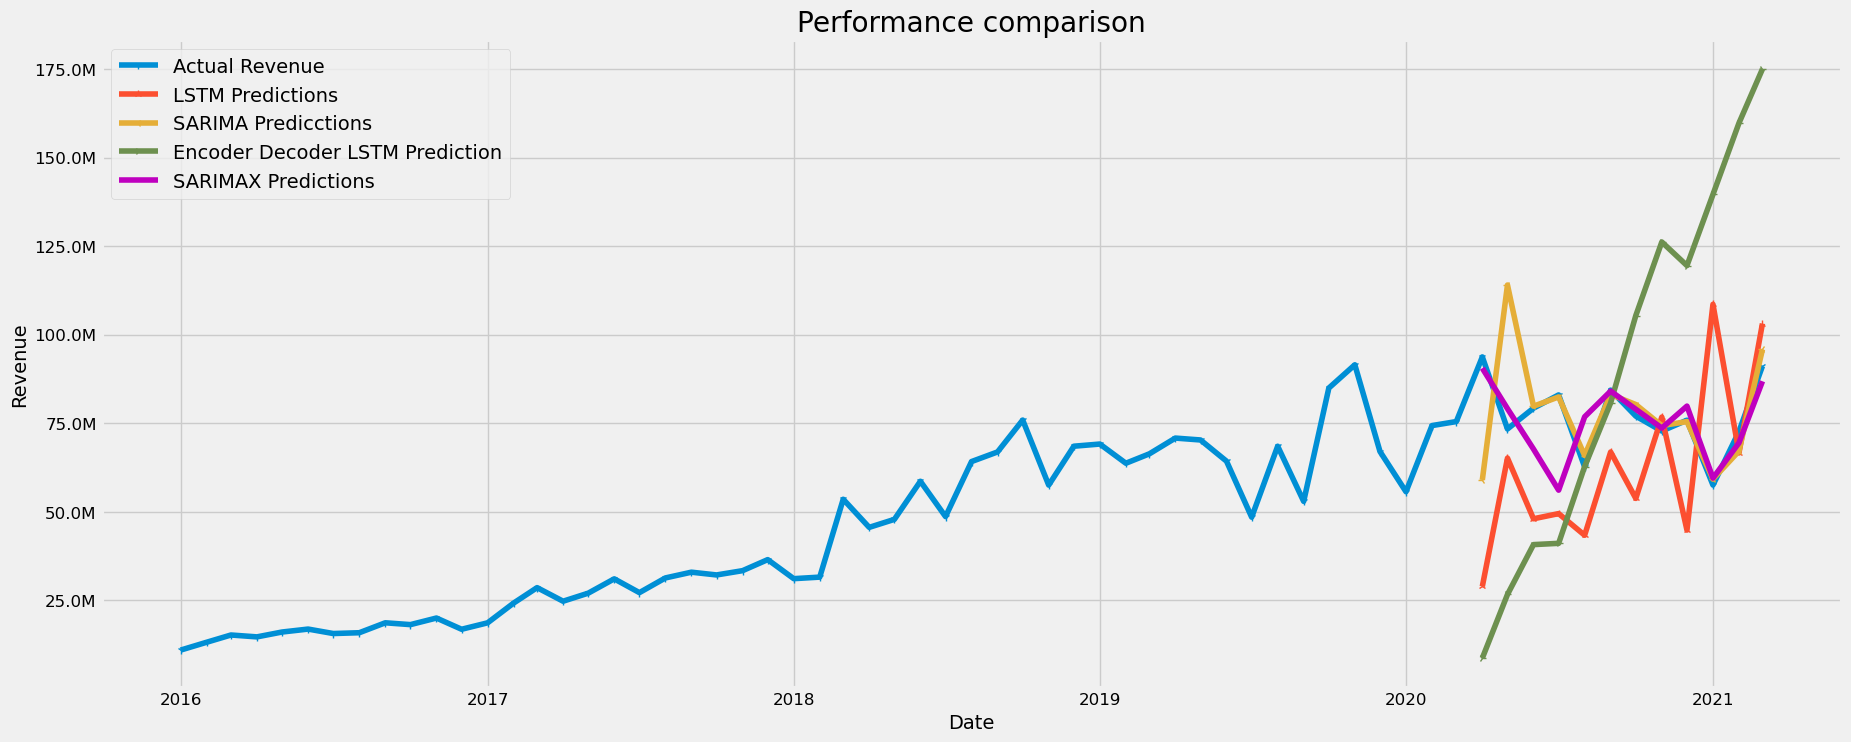

In [377]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

another_df = timedf
y_forecasted = yhat
plt.figure(figsize=(20, 8))
#plt.plot(timedf.index, timedf['Actual Net Revenue - MTD'], 'b-', label = 'Actual Revenue')
plt.plot(df2['Date'], df2['Predict'], '1-', label = 'Actual Revenue') #b
plt.plot(df1['Date'], df1['Predict'], '2-', label = 'LSTM Predictions') #g
plt.plot(df3['Date'], df3['Predict'], '3-', label = 'SARIMA Predicctions ') #r
plt.plot(df5['Date'], df5['Predict'], '4-', label = 'Encoder Decoder LSTM Prediction') #c
plt.plot(df7['Date'], df7['Predict'], 'm-', label = 'SARIMAX Predictions') #m


plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.xlabel('Date'); plt.ylabel('Revenue'); plt.title('Performance comparison')
plt.legend();
plt.show()

In [2]:
df2

NameError: name 'df2' is not defined